<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'> Homework 02  </font></center></h1>
<h2><center> <font color='black'> Regression & Regularization</font></center></h2>    
<h2><center> <font color='black'> MTAT.03.319 - Business Data Analytics</font></center></h2>
<h2><center> <font color='black'> University of Tartu - Spring 2021</font></center></h2>
</div>

# Homework instructions

- Please provide the names and student IDs of the team-members (Maximum 2 person) in the field "Team mates" below. If you are not working in a team please insert only your name and student ID. 

- The accepted submission formats are Colab links or .ipynb files. If you are submitting Colab links please make sure that the privacy settings for the file is public so we can access your code. 

- The submission will automatically close on <font color='red'>**21 March at 23:59**</font>, so please make sure to submit before the deadline. 

- ONLY one of the teammates should submit the homework. We will grade the homework and the marks and feedback is applied for both the team members. So please communicate with your team member about marks and feedback if you are submit the homework.

- If a question is not clear, please ask us in Moodle ONLY. 

- After you have finished solving the Homework, please restart the Kernel and run all the cells to check if there is any persisting issues. 

- Plagiarism is <font color='red'>**PROHIBITED**</font>. Any form of plagiarism will be dealt according to the university policy (https://www.ut.ee/en/current-students/academic-fraud).


# Introduction

* In this homework you are going to apply supervised learning: Linear Regression method using Scikit-learn package; Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy [https://en.wikipedia.org/wiki/Scikit-learn].

### The homework is divided into four sections and the points are distributed as below:
<pre>
- Linear Regression    -> 2 points
- PCA                  -> 2 points
- Overfitting          -> 5 points
_________________________________________
Total                  -> 9 points
</pre>

# 1. Regression 
## 1.1 Linear Regression (2 points)

We are going to use the Prices dataset that contains 74 columns. Each column represents a feature of houses for sale. The ```SalePrice``` column  shows their prices. 

In [1]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler # preprocessing
from sklearn.preprocessing import PolynomialFeatures # preprocessing
from sklearn.preprocessing import scale # preprocessing
from sklearn.feature_selection import RFE # preprocessing

from sklearn.linear_model import LinearRegression # ML alg

# cross validation 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# import warnings # supress warnings
# warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
data = pd.read_csv("Prices.csv")
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [3]:
#All NaN values of the dataset
data.isna().sum().sort_values().tail(14)

Electrical        1
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
BsmtFinType2     38
BsmtExposure     38
GarageFinish     81
GarageQual       81
GarageCond       81
GarageYrBlt      81
GarageType       81
LotFrontage     259
dtype: int64

The column names are self-explanatory which indicates features of each house.

**1.1.1. The target label is```SalePrice``` which means, later we will predict the sale-price based on the given features (columns). But for regression task, it is important to ensure that the data is not skewed. In order to do that, please plot the distribution of ```SalePrice``` column and explain what do you see. (0.2 point)**

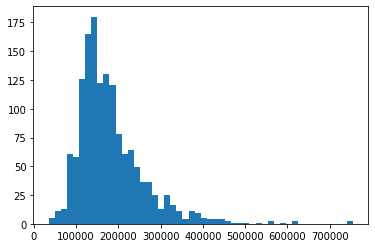

In [4]:
import matplotlib.pyplot as plt

plt.hist(data["SalePrice"], bins=50)

plt.show()

**<font color='red'>Answer:</font>** According to the plot, data is right skewed.

So, the data seems to be skewed which has to be fixed otherwise it may lead to erronous result. 
Apart from that, look closely, some columns are not numerical. For those, you have to convert them to numerical value or represent them in a way so that the algorithm can understand the data. One of such way is called, one hot encoding. Along with that, the algorithm cannot deal with NaN or Infinite values. So please address all of these in the preprocessing section. 

- Preprocess for skewed data
- Apply one-hot encoding to categorical data types
- Replace negative NaN and infinite values with 0

**1.1.2. After preprocessing the skewed data, plot ```SalePrice``` column distribution again. (0.05 point)**

In [5]:
import numpy as np

hotdata = pd.get_dummies(data)
newhot= hotdata.replace(-np.inf,0)

newhot = np.log(newhot)

newhot = newhot.replace(0, 1)

newhot = newhot.replace(-np.inf, 0)
newhot.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.094345,4.174387,9.041922,1.945910,1.609438,7.602401,7.602401,5.278115,6.559615,0.0,5.010635,6.752270,6.752270,6.749931,0.0,7.444249,1.0,0.0,0.693147,1.0,1.098612,1.0,2.079442,0.0,7.602401,0.693147,6.306275,0.000000,4.110874,0.000000,0.0,0.0,0.0,0.0,0.693147,7.604894,12.247694,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.995732,4.382027,9.169518,1.791759,2.079442,7.588830,7.588830,0.000000,6.885510,0.0,5.648974,7.140453,7.140453,0.000000,0.0,7.140453,0.0,1.0,0.693147,0.0,1.098612,1.0,1.791759,1.0,7.588830,0.693147,6.131226,5.697093,0.000000,0.000000,0.0,0.0,0.0,0.0,1.609438,7.604396,12.109011,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.094345,4.219508,9.328123,1.945910,1.609438,7.601402,7.601902,5.087596,6.186209,0.0,6.073045,6.824374,6.824374,6.763885,0.0,7.487734,1.0,0.0,0.693147,1.0,1.098612,1.0,1.791759,1.0,7.601402,0.693147,6.410175,0.000000,3.737670,0.000000,0.0,0.0,0.0,0.0,2.197225,7.604894,12.317167,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.248495,4.094345,9.164296,1.945910,1.609438,7.557473,7.585789,0.000000,5.375278,0.0,6.291569,6.628041,6.867974,6.628041,0.0,7.448334,1.0,0.0,1.000000,0.0,1.098612,1.0,1.945910,1.0,7.599902,1.098612,6.464588,0.000000,3.555348,5.605802,0.0,0.0,0.0,0.0,0.693147,7.603898,11.849398,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4.094345,4.430817,9.565214,2.079442,1.609438,7.600902,7.600902,5.857933,6.484635,0.0,6.194405,7.043160,7.043160,6.959399,0.0,7.695303,1.0,0.0,0.693147,1.0,1.386294,1.0,2.197225,1.0,7.600902,1.098612,6.728629,5.257495,4.430817,0.000000,0.0,0.0,0.0,0.0,2.484907,7.604894,12.429216,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


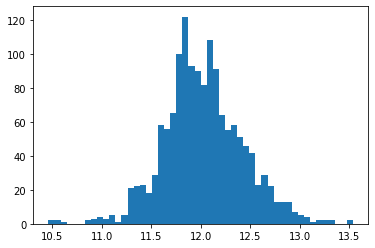

In [6]:
plt.hist(newhot["SalePrice"], bins=50)

plt.show()

**1.1.3. Calculate the correlation between price and each feature. Which are the top 3 features that have the highest correlation with  price? Is the correlation positive or negative? Explain what happens with the price when each of those 3 features change (consider only one feature at a time) and others are kept constant. (0.25 point)** 



In [7]:
corrdata=newhot[newhot.columns[0:]].corr()['SalePrice'][:-1]
print(corrdata.sort_values().tail(4))

1stFlrSF       0.608947
GrLivArea      0.730255
OverallQual    0.801120
SalePrice      1.000000
Name: SalePrice, dtype: float64


<font color='red'> **Answer:**</font> The top 3 features are: OverallQual, GrLivArea, 1stFlrSF
- It seems correlations are positive
- The price increase  0.801120, 0.730255, 0.608947 respectively (3 features shown above) when we increase 1 unit of those features.   

**1.1.4.  Now you have to build a regression model that would be trained on training data and later predict the price on test data. You are free to select features on which you want train the model. The dataset has missing values, so please apply the following methods for dealing with the missing data in the features of your choice:**

a) mean imputation

b) median imputation

c) mode imputation

d) dropping missing values

**Split dataset into the training (80% of the all rows) and test ( 20% of all rows) set, you can use train_test_split function from scikit-learn. While splitting, set the parameter random_state equal to 2, this will reproduce similar split during grading.**

**For each of the case report MAE, RMSE and R<sup>2</sup>. Which method works better ?(1.50 points)**



In [8]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [9]:
# NaN values after preprocessing
newhot.isna().sum().sort_values().tail(5)

Condition1_RRAe            0
SaleCondition_Partial      0
MasVnrArea                 8
GarageYrBlt               81
LotFrontage              259
dtype: int64

In [10]:
#all imputations done and assinged different named datas.
mean_data = newhot.apply(lambda x: x.fillna(x.mean()),axis=0)

median_data = newhot.apply(lambda x: x.fillna(x.median()),axis=0)

mode_data = newhot.copy()

# only three columns have missing values. That is why we did it like below


mode_data['LotFrontage'] = mode_data['LotFrontage'].fillna(mode_data['LotFrontage'].mode()[0])
mode_data['MasVnrArea'] = mode_data['MasVnrArea'].fillna(mode_data['MasVnrArea'].mode()[0])
mode_data['GarageYrBlt'] = mode_data['GarageYrBlt'].fillna(mode_data['GarageYrBlt'].mode()[0])

drop_data = newhot.dropna()

print(mean_data.head(10))

print(median_data.head(10))

print(mode_data.head(10))

print(drop_data.head(10))

   MSSubClass  LotFrontage  ...  SaleCondition_Normal  SaleCondition_Partial
0    4.094345     4.174387  ...                   1.0                    0.0
1    2.995732     4.382027  ...                   1.0                    0.0
2    4.094345     4.219508  ...                   1.0                    0.0
3    4.248495     4.094345  ...                   0.0                    0.0
4    4.094345     4.430817  ...                   1.0                    0.0
5    3.912023     4.442651  ...                   1.0                    0.0
6    2.995732     4.317488  ...                   1.0                    0.0
7    4.094345     4.191049  ...                   1.0                    0.0
8    3.912023     3.931826  ...                   0.0                    0.0
9    5.247024     3.912023  ...                   1.0                    0.0

[10 rows x 271 columns]
   MSSubClass  LotFrontage  ...  SaleCondition_Normal  SaleCondition_Partial
0    4.094345     4.174387  ...                   1

In [11]:
#Data formalized 
new_features_mean = mean_data[["SalePrice", "1stFlrSF", "GrLivArea", "OverallQual", "MasVnrArea", "GarageYrBlt", "LotFrontage"]]

print(new_features_mean.head(10))

new_features_median = median_data[["SalePrice", "1stFlrSF", "GrLivArea", "OverallQual", "MasVnrArea", "GarageYrBlt", "LotFrontage"]]

print(new_features_median.head(10))

new_features_mode = mode_data[["SalePrice", "1stFlrSF", "GrLivArea", "OverallQual", "MasVnrArea", "GarageYrBlt", "LotFrontage"]]

print(new_features_mode.head(10))

new_features_drop = drop_data[["SalePrice", "1stFlrSF", "GrLivArea", "OverallQual", "MasVnrArea", "GarageYrBlt", "LotFrontage"]]

print(new_features_drop.head(10))

   SalePrice  1stFlrSF  GrLivArea  ...  MasVnrArea  GarageYrBlt  LotFrontage
0  12.247694  6.752270   7.444249  ...    5.278115     7.602401     4.174387
1  12.109011  7.140453   7.140453  ...    0.000000     7.588830     4.382027
2  12.317167  6.824374   7.487734  ...    5.087596     7.601402     4.219508
3  11.849398  6.867974   7.448334  ...    0.000000     7.599902     4.094345
4  12.429216  7.043160   7.695303  ...    5.857933     7.600902     4.430817
5  11.870600  6.679599   7.216709  ...    0.000000     7.597396     4.442651
6  12.634603  7.434848   7.434848  ...    5.225747     7.602900     4.317488
7  12.206073  7.009409   7.644919  ...    5.480639     7.587311     4.191049
8  11.774520  6.929517   7.480992  ...    0.000000     7.565793     3.931826
9  11.678440  6.981935   6.981935  ...    0.000000     7.569928     3.912023

[10 rows x 7 columns]
   SalePrice  1stFlrSF  GrLivArea  ...  MasVnrArea  GarageYrBlt  LotFrontage
0  12.247694  6.752270   7.444249  ...    5.278115   

In [12]:
X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(new_features_mean.loc[:, new_features_mean.columns != 'SalePrice']
, new_features_mean['SalePrice'],
                                     train_size = 0.8, 
                                     test_size = 0.2, 
                                     random_state = 2)

X_train_median, X_test_median, y_train_median, y_test_median = train_test_split(new_features_median.loc[:, new_features_median.columns != 'SalePrice']
, new_features_median['SalePrice'],
                                     train_size = 0.8, 
                                     test_size = 0.2, 
                                     random_state = 2)
X_train_mode, X_test_mode, y_train_mode, y_test_mode = train_test_split(new_features_mode.loc[:, new_features_mode.columns != 'SalePrice']
, new_features_mode['SalePrice'],
                                     train_size = 0.8, 
                                     test_size = 0.2, 
                                     random_state = 2)
X_train_drop, X_test_drop, y_train_drop, y_test_drop = train_test_split(new_features_drop.loc[:, new_features_drop.columns != 'SalePrice']
, new_features_drop['SalePrice'],
                                     train_size = 0.8, 
                                     test_size = 0.2, 
                                     random_state = 2)

In [13]:
lr_model_mean = LinearRegression()
lr_model_median = LinearRegression()
lr_model_mode = LinearRegression()
lr_model_drop = LinearRegression()

lr_model_mean.fit(X_train_mean, y_train_mean) 
lr_model_median.fit(X_train_median, y_train_median)
lr_model_mode.fit(X_train_mode, y_train_mode)
lr_model_drop.fit(X_train_drop, y_train_drop)

lr_pred_mean = lr_model_mean.predict(X_test_mean) 
lr_pred_median = lr_model_median.predict(X_test_median) 
lr_pred_mode = lr_model_mode.predict(X_test_mode) 
lr_pred_drop = lr_model_drop.predict(X_test_drop) 

lr_pred_tr_mean = lr_model_mean.predict(X_train_mean)
lr_pred_tr_median = lr_model_median.predict(X_train_median) 
lr_pred_tr_mode = lr_model_mode.predict(X_train_mode) 
lr_pred_tr_drop = lr_model_drop.predict(X_train_drop) 

In [14]:
#MAE
test_set_mae_mean = mean_absolute_error(y_test_mean, lr_pred_mean)
test_set_mae_median = mean_absolute_error(y_test_median, lr_pred_median)
test_set_mae_mode = mean_absolute_error(y_test_mode, lr_pred_mode)
test_set_mae_drop = mean_absolute_error(y_test_drop, lr_pred_drop)

#RMSE
test_set_rmse_mean = (np.sqrt(mean_squared_error(y_test_mean, lr_pred_mean)))
test_set_rmse_median = (np.sqrt(mean_squared_error(y_test_median, lr_pred_median)))
test_set_rmse_mode = (np.sqrt(mean_squared_error(y_test_mode, lr_pred_mode)))
test_set_rmse_drop = (np.sqrt(mean_squared_error(y_test_drop, lr_pred_drop)))


#R^2
test_set_r2_mean = r2_score(y_test_mean, lr_pred_mean)
test_set_r2_median = r2_score(y_test_median, lr_pred_median)
test_set_r2_mode = r2_score(y_test_mode, lr_pred_mode)
test_set_r2_drop = r2_score(y_test_drop, lr_pred_drop)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


methods = ['mean imputation', 'median imputation', 'mode imputation', 'dropping missing values']
#Store the result in the following variables
MAE = [test_set_mae_mean, test_set_mae_median, test_set_mae_mode, test_set_mae_drop]
RMSE = [test_set_rmse_mean, test_set_rmse_median, test_set_rmse_mode, test_set_rmse_drop]
R2 = [test_set_r2_mean, test_set_r2_median, test_set_r2_mode, test_set_r2_drop]
#TODO


#print the metrics
i = 0

for m in methods:
    print("Method: " + m + "  MAE: " + str(MAE[i]) + "  RMSE: " + str(RMSE[i]) + "  R2: " + str(R2[i]))
    i+=1

Method: mean imputation  MAE: 0.12639079825193167  RMSE: 0.17444293506405248  R2: 0.8191708282201269
Method: median imputation  MAE: 0.1264463328297846  RMSE: 0.17464677701060227  R2: 0.8187479723823553
Method: mode imputation  MAE: 0.12780980134765554  RMSE: 0.17747801572735086  R2: 0.8128237027600651
Method: dropping missing values  MAE: 0.12484414719138363  RMSE: 0.1903257143274362  R2: 0.7526938566547206


<font color='red'> **Answer:**</font> The best method is mean imputation. Because the value of the mean imputation is lower in MAE and RMSE which implies higher accuracy of a regression model. While, it has the highest value of R square which is considered desirable.

**Please store the best MAE, RMSE, r2_best score in the following variables. We will use these variable to compare ```1.2.7```**

In [17]:
mae_best = MAE[3]    #best MAE
rmse_best = RMSE[0]  #best RMSE
r2_best = R2[0]      #best R2

# 1.2 Principal Component Analysis (PCA) (2 points)
Our model performs quite good. But there is always room to make it better and simpler. By simpler, we mean the reducing the dimensionality of the dataset so that we can have a simpler linear regression model. <br> <br>If you noticed after one-hot encoding, we have 270 features (columns) but all these features do not hold the same level of information. For example, the first feature may hold 50% of the information required to make the linear regression acheive the performance we already had; the last, (feature number 270) may contribute to only 0.0000001% to the total output. Hence, adding this last variable (actually there could be more) to our linear regression model (read equation) will only increase the complexity of the model; space, time and computational complexity. Therefore, it is wise and desirable to make the model simpler yet performing the best (better). 
<br> <br>
One such way to reduce the dimensionality of the dataset is known as Pricipal Component Analysis. Using this method, we can find out which features contribute the most in our model, therefore, we can wisely select how many we need. We will perform, PCA in this section of the homework. <br><br>

*There is another powerful method for dimensionality reduction, named t-SNE. We will use t-sne in future homework. <br><br>*



**1.2.1. From ```1.1.4``` keep the best method to deal with missing values and apply PCA to reduce the number of features. (0.5point)**

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = mean_data.drop('SalePrice', 1)
y = mean_data['SalePrice']

#The reason of choosing 50components is the sum of the variances are higher than 95%
pca = PCA(n_components=50, whiten=True, svd_solver='randomized', random_state=0)

#TODO: fit pca
principalComponents = pca.fit(X).fit_transform(X)

last_pca = pd.DataFrame(principalComponents)

last_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.384391,1.289634,-0.864345,-1.646739,-0.103962,0.488609,-0.614230,0.241786,0.008057,-0.827340,-0.115615,1.195470,0.128396,-0.502343,-0.404657,-0.102865,-0.718458,-2.083451,-0.177764,-0.200968,0.886411,0.137776,0.018127,0.335053,-0.050478,0.412983,1.094171,-0.631179,0.052947,1.683419,-0.683325,0.405909,-0.221401,-0.421119,-0.925576,0.506992,-0.237976,0.179859,-0.344741,0.307041,-0.672561,-0.667350,0.052896,-0.180286,-0.500284,0.098063,-0.692106,-0.716246,-0.523252,-0.214149
1,-1.052386,-0.202517,-0.143891,1.526732,-0.180184,-1.358143,-0.503437,-0.498725,-0.305899,-0.247624,-0.067949,-0.295372,-0.506955,-0.282839,0.171038,0.334294,-0.092889,-0.386872,-0.817288,-0.482044,-0.573193,-0.795182,0.218584,2.564547,-0.821820,-1.229606,0.258761,-1.231773,0.310180,0.338994,1.729611,-0.123443,-2.159998,0.171284,1.620024,-0.686380,0.301623,-1.970346,1.087894,-1.511817,1.102819,2.151801,0.358399,0.417100,0.718744,0.205237,-1.096119,0.441646,1.203587,2.191900
2,0.467462,1.265674,-0.680199,-1.612344,-0.196707,0.163251,-0.325050,-0.018430,-0.039948,-0.857667,-0.057049,1.432197,-0.676535,-0.495145,-0.234247,0.684294,-0.804773,-0.416642,0.876600,-0.012140,0.919226,-0.781508,-0.862729,0.295888,0.711684,1.080278,0.141372,-0.380425,0.093292,-0.364399,0.267001,-0.368894,0.532380,0.984550,0.792891,-0.036703,-0.403494,0.156194,-0.765461,-0.919962,-0.600246,0.073408,0.780295,-0.775194,-0.724812,0.080861,1.043674,-1.757657,0.290584,0.713179
3,0.935716,-0.243310,-1.385132,-0.660956,-0.915597,-0.712230,1.084537,2.262823,-1.294321,0.157544,-0.331799,-0.388772,-0.636812,-0.326469,-0.044065,0.559350,-0.326182,1.161687,1.676981,0.510002,-0.419043,0.087987,1.475475,-0.608036,0.657186,-0.698562,-0.723473,1.125317,-0.500010,1.264968,0.733060,2.476015,-0.956398,-1.426472,-0.592617,0.993182,-0.667899,2.357077,0.146999,-0.450194,-2.113885,-1.971793,1.146515,-0.068529,0.602143,-0.404240,0.381714,-1.312589,1.322877,-0.338607
4,0.363253,2.216208,-0.269723,-0.038592,0.102272,-0.190004,-0.244509,0.340837,-0.031446,-0.300207,-0.042084,0.537942,-0.731172,-0.336048,-0.304630,0.641272,-0.716016,-0.218101,1.236486,0.476106,0.826737,-0.599177,0.238207,0.807657,0.608471,0.736850,0.240333,-0.490236,-0.198693,-1.091997,0.366789,-0.326082,0.949539,1.034783,1.004150,-0.133873,-0.037154,-0.361148,-0.334018,-0.132748,-0.796847,-0.102527,0.452686,-0.387516,-1.069972,0.180146,-0.464709,0.061213,0.099367,-0.479968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.677214,-0.362049,0.284345,-0.474436,-0.946588,0.562750,-0.053302,-0.707427,-0.120276,-0.782825,0.000604,0.399031,-0.291884,-0.696724,0.764887,-0.001039,-0.212387,-0.958895,-1.721383,0.843597,0.250382,0.872923,-1.377778,0.937090,0.247190,-0.022544,0.146429,-0.997715,-0.138288,-0.159719,1.753636,0.223455,0.454245,0.534009,0.595595,-0.537579,0.891350,0.334806,-0.492832,-0.791573,0.420443,-0.118245,0.653390,-0.656438,0.478256,-0.073715,0.332341,0.025119,0.151360,-0.042653
1456,-1.413786,0.542146,0.088988,0.987490,1.432611,-0.038441,1.958629,-0.912787,0.900321,-0.765213,0.074554,-0.628842,-0.126205,-0.577542,-0.874084,0.340198,-0.397671,0.020669,-0.800335,0.473179,1.336520,0.035328,-0.656716,-0.613899,-1.583616,-2.876709,1.755369,0.825967,0.695728,2.039977,0.698141,-0.524202,-1.906034,-0.687421,1.139288,-0.682908,-1.576510,0.188850,-0.623981,1.747542,-0.638851,-1.076472,1.345169,1.509063,0.740656,-1.410687,-0.302894,0.761468,-0.044683,-0.045678
1457,0.878088,0.203556,-1.238033,-0.598125,-1.538404,-0.158491,-0.114429,-0.217341,0.156624,0.526864,6.024051,1.638972,0.612352,-0.143660,-0.402176,-0.534372,0.402839,0.178763,-0.904446,-1.895783,0.233135,-0.656973,0.722369,0.547874,1.239732,0.006217,-1.398623,0.744860,0.807354,1.515810,1.5529

**1.2.2. What percentage of the variance is explained by the first five components? (0.10 point)**

In [19]:
explained_variance = pca.explained_variance_ratio_

explained_variancedf = pd.DataFrame(explained_variance)

print(explained_variancedf.head(5))
print(explained_variancedf.head(5).sum()*100)

          0
0  0.189351
1  0.156509
2  0.106065
3  0.084445
4  0.061622
0    59.799184
dtype: float64


<font color='red'> **Answer:**</font> Total percentage of first 5 componenets is 59.79%

It would be helpful if we could see all of the variance against the number of components, so a plot would give us a better understanding of the situation. 

**1.2.3. Please plot the result of PCA you built in ```1.2.1```<br>
X-axis=Number of Components, Y-axis=Total explained variance and explain the result.(0.5 point)**

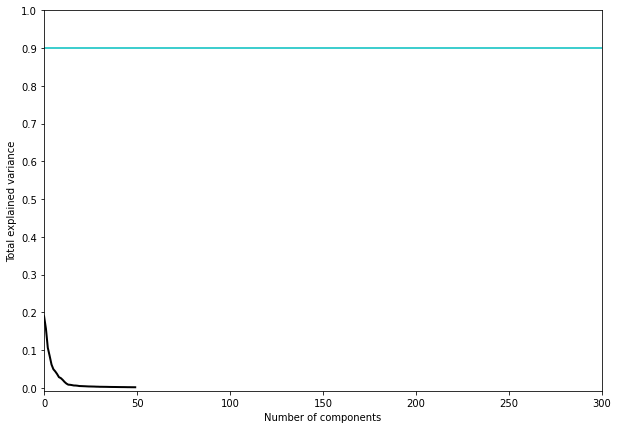

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
lw=2
plt.plot(explained_variance, color = "k", lw=lw)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
    
plt.xlim(0, 300)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axhline(0.9, c='c')
plt.show()

<font color='red'> **Answer:**</font> From the graph it seems that the first record's varience is less than 0.2. And then the varience drop till around 0.001

**1.2.5. Again, from ```1.1.4``` keep the best method to deal with missing values and use PCA to reduce the number of features. But you can use only the number of features that are significant in ```1.1.3```, in this case you have to choose an optimum n_component value based on the PCA plot. Otherwise, you can select all of the features and pass the n_components=37. In all cases, keep random_state for PCA equal to 0. (0.20 points)**

In [21]:
X_37 = mean_data.drop('SalePrice', 1)
y_37 = mean_data['SalePrice']

pca_37 = PCA(n_components=37, whiten=True, svd_solver='randomized', random_state=0)

#TODO: fit pca
principalComponents_37 = pca_37.fit_transform(X_37)

last_pca_37 = pd.DataFrame(principalComponents_37)

last_pca_37

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,0.384391,1.289634,-0.864345,-1.646739,-0.103962,0.488609,-0.614230,0.241786,0.008059,-0.827343,-0.115610,1.195477,0.128524,-0.501820,-0.405062,-0.100740,-0.715852,-2.083290,-0.181674,-0.203722,0.880103,0.141223,0.030872,0.351847,-0.080884,0.464448,1.080953,-0.553559,0.096023,1.670572,-0.765468,0.259308,-0.324106,-0.363363,-0.922413,0.434827,-0.605125
1,-1.052386,-0.202517,-0.143891,1.526732,-0.180184,-1.358143,-0.503437,-0.498724,-0.305901,-0.247615,-0.067946,-0.295453,-0.507336,-0.284750,0.173596,0.329191,-0.102506,-0.391259,-0.819481,-0.442251,-0.569331,-0.800175,0.147158,2.500901,-0.770407,-1.272023,0.272884,-1.376201,0.296724,0.636186,1.943640,-0.285539,-1.767960,0.499920,1.346136,-0.204658,1.692192
2,0.467462,1.265674,-0.680199,-1.612344,-0.196707,0.163251,-0.325050,-0.018430,-0.039946,-0.857669,-0.057044,1.432210,-0.676553,-0.494956,-0.233985,0.684713,-0.806841,-0.418944,0.874928,-0.014903,0.916270,-0.788957,-0.858884,0.309976,0.712411,1.082802,0.108069,-0.392760,0.063459,-0.376028,0.320094,-0.332700,0.710852,0.998001,0.817748,-0.066204,-0.724629
3,0.935716,-0.243310,-1.385132,-0.660956,-0.915597,-0.712231,1.084537,2.262823,-1.294318,0.157534,-0.331811,-0.388715,-0.636536,-0.324658,-0.045074,0.563016,-0.319168,1.170453,1.669528,0.502436,-0.433294,0.076067,1.502207,-0.549599,0.638383,-0.656022,-0.773451,1.198729,-0.421818,1.219236,0.410826,2.545402,-1.429934,-1.403274,-0.044392,0.951984,-2.033448
4,0.363253,2.216208,-0.269723,-0.038592,0.102272,-0.190004,-0.244509,0.340837,-0.031446,-0.300206,-0.042084,0.537924,-0.731187,-0.336281,-0.304758,0.640713,-0.715456,-0.218289,1.237400,0.489860,0.827995,-0.587255,0.224643,0.782483,0.601165,0.711915,0.269425,-0.477178,-0.155228,-1.065927,0.322730,-0.264333,1.146392,0.917166,0.761524,-0.280994,-0.241782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.677214,-0.362049,0.284345,-0.474436,-0.946588,0.562750,-0.053302,-0.707427,-0.120277,-0.782821,0.000598,0.399026,-0.292048,-0.697294,0.764749,-0.003238,-0.214341,-0.960017,-1.715825,0.844373,0.254982,0.879374,-1.394216,0.910829,0.236103,-0.068563,0.154661,-1.014349,-0.180027,-0.129302,1.820730,0.517044,0.576809,0.450878,0.400259,-0.166764,0.401323
1456,-1.413786,0.542146,0.088988,0.987490,1.432611,-0.038441,1.958629,-0.912787,0.900319,-0.765212,0.074551,-0.628816,-0.126153,-0.577747,-0.874939,0.340176,-0.393081,0.024396,-0.795038,0.467979,1.334159,0.038198,-0.654079,-0.599842,-1.603205,-2.882912,1.817438,0.867933,0.689176,2.093151,0.791276,-0.530748,-1.759044,-0.448392,1.116601,-1.381924,-1.430909
1457,0.878088,0.203556,-1.238033,-0.598125,-1.538404,-0.158492,-0.114429,-0.217340,0.156630,0.526854,6.024045,1.639016,0.612563,-0.141228,-0.403419,-0.529246,0.405078,0.183418,-0.918145,-1.920632,0.209670,-0.651667,0.757238,0.597693,1.163947,0.079530,-1.502632,0.926827,0.879640,1.239116,1.480855,-1.732173,0.358983,-1.142844,-0.882723,1.378043,-0.338273
1458,-0.970733,-0.978909,-0.822043,2.473576,1.807874,1.928759,2.120084,1.752533,-0.599338,0.045982,-0.847862,0.674558,0.039060,0.576282,1.019718,-1.612164,0.436282,-1.368963,-0.751459,-2.161656,-1.319058,-0.549653,-0.187213,0.960577,-0.933936,1.866009,0.034614,-0.665785,0.353457,-1.184068,-2.858174,0.967263,-0.219881,0.037606,-1.311690,-0.436655,-2.404068


**1.2.6. Use the new components derived from PCA to predict the house pricing. Keep the ratio of test and train set to 20/80 and the random_state equal to 0. Report MAE, RMSE and R<sup>2</sup> (0.60 point)** <br>
*Hint: Now your training data is different. Please use pca.transform(X) function to create your new training dataset. But make sure you have the fitted pca from ```1.2.5```*

In [22]:
pca_X = pca_37.transform(X_37)
pca_X_df = pd.DataFrame(pca_X)

mean_data_reset = mean_data["SalePrice"].reset_index(drop=True)
mean_data_reset = pd.DataFrame(mean_data_reset)

new_df = pca_X_df.combine_first(mean_data_reset)
new_df


#methods = ['mean imputation', 'median imputation', 'mode imputation', 'dropping missing values']
#MAE = []
#RMSE = []
#R2 = []
    
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(new_df.loc[:, new_df.columns != 'SalePrice']
, new_df['SalePrice'],
                                     train_size = 0.8, 
                                     test_size = 0.2, 
                                     random_state = 0)

regressor = LinearRegression()

#TODO: train the regression model

#y_predicted_pca = #TODO: predict on test dataset

regressor = LinearRegression()
regressor.fit(X_train_pca, y_train_pca)
lr_pred = regressor.predict(X_test_pca) 
lr_pred_tr = regressor.predict(X_train_pca) 


mae_pca = mean_absolute_error(y_test_pca, lr_pred)

rmse_pca = (np.sqrt(mean_squared_error(y_test_pca, lr_pred)))

r2_pca = r2_score(y_test_pca, lr_pred)
    
print("MAE: " + str(mae_pca) + "  RMSE: " + str(rmse_pca) + "  R2: " + str(r2_pca))


MAE: 0.13334385848671745  RMSE: 0.18767445304991373  R2: 0.7673597284590572


**1.2.7 The following cell would calculate the difference between pre-PCA and post-PCA. Please explain the situation based on the differences. (0.1 point)**

In [23]:
print("MAE difference after PCA: ", mae_best-mae_pca)
print("RMSE difference after PCA: ", rmse_best-rmse_pca)
print("R2 difference after PCA: ", r2_best-r2_pca)

MAE difference after PCA:  -0.00849971129533382
RMSE difference after PCA:  -0.013231517985861252
R2 difference after PCA:  0.05181109976106968


<font color='red'> **Answer:**</font> After the PCA we can see that the value of MAE and RMSE increased, while R2 value decreased

## 1.3 Overfitting (5 points)

Now our model is comparatively better than the earlier models. It is less complex yet performs the almost the same. Let's dive a little deeper into the model now. In this section, we will check if the model is overfitting. The concept of overfitting has already been delivered in the lectures. However, if you are interesed in honing it up, please take a look here or anywhere you understand better: https://datascience.foundation/sciencewhitepaper/underfitting-and-overfitting-in-machine-learning
<br>
But, unfortunately it is difficult to know if a model is overfitting or underfitting. One way to know more about model's performance is cross-validation. Cross-validation is also used in the hyperparameter searching to find the best performing model in a given scenario.  
We have a few techniques to prevent overfitting and we will focus on 
- 1.3.1 Cross-validation 
    - K-Fold cross-validation: Most common (we would apply this one to see the performance of the Linear regression model)
    - Leave One Out (LOO): Takes each row as the validation set for once, and trains the model on the rest n-1 rows. Thus, it trains n number of models.

    - Leave P-Out (LPO): Creates possible splits after leaving p samples out. For n rows, there would be (nCp) possibile train-test splits.
    - (For classification problems) Stratified K-Fold: Ensures relative class proportion is preserved in each train and validation fold. Important when the class label is imbalanced (e.g. 95% label: 1; 5% label: 0).
    
    *The last three techniques will be discussed in detail in the 7th Lecture.* <br><br>
    
- 1.3.2 Regularization 
    - L1 (Lasso)    
    - L2 (Ridge)



**1.3.0. Now we have to check if the trained regression model in ```1.1.4``` is overfitting. Please use R<sup>2</sup> value on train and test result to determine the overfitting. Please explain the result from the perspective of the dataset and the value(0.2 point)**

In [24]:
from sklearn import metrics
print(metrics.r2_score(y_train_mean, lr_pred_tr_mean))
print(metrics.r2_score(y_test_mean, lr_pred_mean))

0.7899919000354128
0.8191708282201269


<font color='red'> **Answer:**</font> In our result it seems that R2test>R2training so, it indicates that our model generalize well

**1.3.1 Please apply K-fold=10 fold closs validation on the training dataset of ```1.1.4``` Keep random_state=1, shuffle=True, while performing cross validation, make sure that return_train_score=True.(0.5 point)**


In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from numpy import mean
from numpy import std

lm = LinearRegression()
cv = KFold(n_splits = 10, shuffle = True, random_state = 1)
scores = cross_validate(lm, X_train_mean, y_train_mean, scoring=['r2', "neg_mean_squared_error"], cv=cv, return_train_score=True)
#scores
# step-1: create a cross-validation scheme

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 7))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train_mean, y_train_mean)

rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe,  # Feature ranking with recursive feature elimination.
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = cv, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_mean, y_train_mean)

#model_cv.best_params_ (gives the n_features_optimal (6))

cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results

#TODO: create model
# final model with cross validation and param tunning
n_features_optimal = 6

lm = LinearRegression() # create the model

rfe = RFE(lm, n_features_to_select=n_features_optimal)  #Feature ranking with recursive feature elimination.  https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html         
rfe = rfe.fit(X_train_mean, y_train_mean) # fit the model

# predict prices of X_test
y_pred = rfe.predict(X_test_mean) # make prediction
r2 = sklearn.metrics.r2_score(y_test_mean, y_pred)
mse = metrics.mean_squared_error(y_test_mean, y_pred) # evaluate the model

#TODO: evaluate model using R^2, and MSE as evaluation metrics
#While setting MSE metrics, make sure you pass the right keyword 

# report performance
print('R^2: %.3f (%.3f)' % (mean(scores['test_r2']), std(scores['test_r2'])))
print('MSE: %.3f (%.3f)' % (mean(scores['test_neg_mean_squared_error']), std(scores['test_neg_mean_squared_error'])))

Fitting 10 folds for each of 6 candidates, totalling 60 fits
R^2: 0.785 (0.053)
MSE: -0.034 (0.010)


**1.3.1.2. Please plot the training and test R<sup>2</sup> value where X-axis=number of folds, Y-axis=R<sup>2</sup> value. Explain the plot, if the model shows overfitting or not.(0.3 point)**

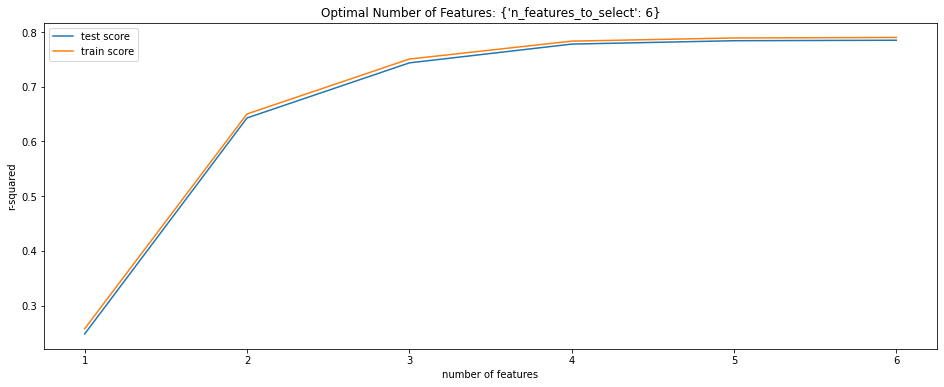

In [26]:
plt.figure(figsize=(16,6))
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title(f"Optimal Number of Features: {model_cv.best_params_}")
plt.legend(['test score', 'train score'], loc='upper left')
#TODO: plot the trendlines

<font color='red'> **Answer:**</font> In the exercise 1.3.0 the difference between the R2test and R2training was 0.03 however now the difference is less than 0.01. Also it seems that our train score is slightly big which means that our model has learned the training dataset too well

**1.3.2  Please apply L1 (Lasso) regularization with variable alpha parameters and report the corresponding alpha value and R<sup>2</sup> value. Use the training split from ```1.1.4``` (1.5 point)**

In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import pandas as pd
from sklearn.linear_model import Lasso, Ridge


cross_val_scores_lasso = [] 
  
# List to maintain the different values of alpha 
alpha = [] 

y = new_features_mean['SalePrice']
X = new_features_mean.drop('SalePrice', axis = 1) 

# Loop to for different alpha value 
for i in range(1, 9): 
    #TODO: formulate the lasso model where alpha=i * 0.0001
    lassoModel = Lasso(alpha = i * 0.001)  # alpha: Regularization strength; must be a positive float.
    #TODO: fit the lasso model on whole X,y 
    lassoModel.fit(X_train_mean, y_train_mean) 
    #TODO: perform 10 fold cross validation and store the result in score variable
    scores = cross_val_score(lassoModel, X, y, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    
    cross_val_scores_lasso.append(avg_cross_val_score) 
    alpha.append(i * 0.0001) 
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i])) 
    
    


0.0001 : 77.24294310554207
0.0002 : 77.19900618445419
0.00030000000000000003 : 77.11995901835668
0.0004 : 77.0058046636781
0.0005 : 76.85653872104197
0.0006000000000000001 : 76.67216356483007
0.0007 : 76.45267808004469
0.0008 : 76.19808384739069


**1.3.3. Take the best alpha value from ```1.3.2``` and use it to train a new lasso model and report the  R<sup>2</sup> value on test set. Use the train test split from ```1.1.4```. (0.5 point)**

In [28]:
# Building and fitting the Lasso Regression Model 
from sklearn.model_selection import train_test_split
lassoModelBest = Lasso(alpha = 0.0001) # from the above the best alpha value is 0.0001

#TODO: Fit the model again 
lassoModelBest.fit(X_train_mean, y_train_mean)  # 2nd step
  
# Evaluating the Lasso Regression model 
print(lassoModelBest.score(X_test_mean, y_test_mean)) 

0.8204269618460696


**1.3.4.  Please apply L2 (Ridge) regularization with variable alpha parameters and report the corresponding alpha value and R<sup>2</sup> value. Use the training split from ```1.1.4``` (1.5 point)**

N.B. The $alpha$ here in the ridge regularization is the same as $lambda$ you saw in the lecture. We did not initiate the variable with $lambda$ because $lambda$ is a reserved keyword in python which is used to create small anonymous functions. A $lambda$ function can take any number of arguments, but can only have one expression.
You can read more about it here: https://www.w3schools.com/python/ref_keyword_lambda.asp#:~:text=The%20lambda%20keyword%20is%20used,and%20the%20result%20is%20returned.

In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import train_test_split, cross_val_score 
from statistics import mean 

In [30]:

cross_val_scores_ridge = [] 
  
# List to maintain the different values of alpha 
alpha = [] 
y = new_features_mean['SalePrice']
X = new_features_mean.drop('SalePrice', axis = 1) 



# Loop to for different alpha value 
for i in range(1, 9): 
    #TODO: formulate the ridge model where alpha=i * 0.0001
    ridgeModel = Ridge(alpha = i * 0.001)  # alpha: Regularization strength; must be a positive float.


    #TODO: fit the ridge model on whole X, y
    ridgeModel.fit(X_train_mean, y_train_mean) 

    #TODO: perform 10 fold cross validation and store the result in score variable
    scores = cross_val_score(ridgeModel, X, y, cv = 10) 

    avg_cross_val_score = mean(scores)*100
    
    cross_val_scores_ridge.append(avg_cross_val_score) 
    alpha.append(i * 0.0001) 
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i])) 
    
    


0.0001 : 79.10106431742476
0.0002 : 79.1013114671388
0.00030000000000000003 : 79.10137715002003
0.0004 : 79.10126873932174
0.0005 : 79.10099330881482
0.0006000000000000001 : 79.10055764623613
0.0007 : 79.09996826606161
0.0008 : 79.0992314216418


**1.3.5. Take the best alpha value from ```1.3.4``` and use it to train a new ridge model and report the  R<sup>2</sup> value on test set. Use the train test split from ```1.1.4```. (0.5 point)**

In [31]:
# Building and fitting the Ridge Regression Model 
from sklearn.model_selection import train_test_split
ridgeModelBest = Ridge(alpha = 0.0003) # from the above the best value for alpha is 0.0003

#TODO: Fit the model again 
ridgeModelBest.fit(X_train_mean, y_train_mean)  # 2nd step

# Evaluating the ridge Regression model 
print(ridgeModelBest.score(X_test_mean, y_test_mean)) 

0.819198720119198
